In [1]:
#Sales_Data Analytics 
#import libraries
import pandas as pd
from matplotlib import pyplot as pd

In [7]:
#load dataset
import pandas as pd
data=pd.read_csv("sales_data.csv")
df=pd.DataFrame(data)
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [13]:
print(df.info(),"\n")
print("Aggregation:\n",df.agg({"Sales_Amount":["min","max","mean"],"Quantity_Sold":["min","max","mean"]}))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB
None 

Aggrega

In [16]:
#unique sales person
print("Unique_salesRep:\n",df["Sales_Rep"].unique())
#unique region
print("Available Regions:\n",df["Region"].unique())

Unique_salesRep:
 ['Bob' 'David' 'Charlie' 'Eve' 'Alice']
Available Regions:
 ['North' 'West' 'South' 'East']


In [18]:
#give a sales amount and quantity by region
df.groupby("Region")[["Sales_Amount","Quantity_Sold"]].sum()

,Sales_Amount,Quantity_Sold
Region,,
East,1259792.93,6356
North,1369612.51,6705
South,1154250.86,5808
West,1235608.93,6486


In [19]:
#name of available products
df["Product_Category"].unique()

array(['Furniture', 'Food', 'Clothing', 'Electronics'], dtype=object)

In [22]:
#unit cost by product category
df.groupby("Product_Category")["Unit_Cost"].mean()

Product_Category
Clothing       2470.587313
Electronics    2545.330081
Food           2407.998938
Furniture      2472.416115
Name: Unit_Cost, dtype: float64

In [36]:
#salesrep with more/less sales
sales_rep=df.groupby("Sales_Rep")["Sales_Amount"].sum()
print("max salesrep:",sales_rep.idxmax(),"->",sales_rep.max())
print("min salesrep:",sales_rep.idxmin(),"->",sales_rep.min())


max salesrep: David -> 1141737.36
min salesrep: Charlie -> 860811.48


In [48]:
#Region with high and low revenue and sales quatitu
# Group by Region → sum Sales & Quantity
region_totals = df.groupby("Region")[["Sales_Amount", "Quantity_Sold"]].sum()

# High / Low Revenue
high_rev_region = region_totals["Sales_Amount"].idxmax()
low_rev_region = region_totals["Sales_Amount"].idxmin()

print("High Revenue Region:", high_rev_region, 
      "->", region_totals.loc[high_rev_region, "Sales_Amount"])

print("Low Revenue Region:", low_rev_region, 
      "->", region_totals.loc[low_rev_region, "Sales_Amount"])

# High / Low Quantity
high_qty_region = region_totals["Quantity_Sold"].idxmax()
low_qty_region = region_totals["Quantity_Sold"].idxmin()

print("High Quantity Region:", high_qty_region, 
      "->", region_totals.loc[high_qty_region, "Quantity_Sold"])

print("Low Quantity Region:", low_qty_region, 
      "->", region_totals.loc[low_qty_region, "Quantity_Sold"])


High Revenue Region: North -> 1369612.51
Low Revenue Region: South -> 1154250.86
High Quantity Region: North -> 6705
Low Quantity Region: South -> 5808


In [5]:
#list customer type
import pandas as pd
data=pd.read_csv("sales_data.csv")
df=pd.DataFrame(data)
print(df["Customer_Type"].unique())
print(df["Customer_Type"].value_counts())

['Returning' 'New']
Customer_Type
New          504
Returning    496
Name: count, dtype: int64


In [6]:
#no of sales in online/retail
df.groupby("Sales_Channel")["Product_ID"].count()

Sales_Channel
Online    488
Retail    512
Name: Product_ID, dtype: int64

In [12]:
#regio with famouse product
famous=(df.groupby(["Region","Product_Category"])["Quantity_Sold"].sum().reset_index().sort_values(["Region","Quantity_Sold"],ascending=[True,False]).groupby("Region").first())
print(famous)

       Product_Category  Quantity_Sold
Region                                
East           Clothing           1797
North          Clothing           1939
South              Food           1577
West          Furniture           1889


In [20]:
df["Sale_Date"] = pd.to_datetime(df["Sale_Date"], errors="coerce")
print(df.dtypes)
df["Year"] = df["Sale_Date"].dt.year
df["Month"] = df["Sale_Date"].dt.month
df["Day"] = df["Sale_Date"].dt.day
df["Month"].unique()

Product_ID                       int64
Sale_Date               datetime64[ns]
Sales_Rep                       object
Region                          object
Sales_Amount                   float64
Quantity_Sold                    int64
Product_Category                object
Unit_Cost                      float64
Unit_Price                     float64
Customer_Type                   object
Discount                       float64
Payment_Method                  object
Sales_Channel                   object
Region_and_Sales_Rep            object
Year                             int32
Month                            int32
Day                              int32
dtype: object


array([ 2,  4,  9,  8,  3,  1,  6, 10, 11, 12,  5,  7], dtype=int32)

In [26]:
#No of sales month wise & month with more sales
import datetime as dt
df["Month"]=df["Sale_Date"].dt.month
df.groupby("Month")["Sales_Amount"].sum().reset_index().sort_values("Sales_Amount",ascending=False)


,Month,Sales_Amount
0,1,495420.37
10,11,467482.90
9,10,460378.78
7,8,443171.28
3,4,438992.61
5,6,418458.34
2,3,402638.77
11,12,392643.58
4,5,389078.76
6,7,374242.88


In [31]:
#Each Sales rep high selling product
df.groupby(["Sales_Rep","Product_Category"])["Sales_Amount"].sum().reset_index().sort_values("Sales_Amount",ascending=False).groupby("Sales_Rep").first()

,Product_Category,Sales_Amount
Sales_Rep,,
Alice,Electronics,262316.29
Bob,Food,312988.52
Charlie,Clothing,243329.67
David,Clothing,318184.84
Eve,Electronics,277780.56


In [34]:
#  Sales amount with discount for each category
df.groupby("Product_Category").apply(lambda g:(g["Sales_Amount"]*g["Discount"]).sum())


C:\Users\agaly\AppData\Local\Temp\ipykernel_17372\303432036.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("Product_Category").apply(lambda g:(g["Sales_Amount"]*g["Discount"]).sum())


Product_Category
Clothing       217076.8703
Electronics    165690.2339
Food           186342.8587
Furniture      201517.5292
dtype: float64

<Axes: title={'center': 'Revenue By region'}, xlabel='Region'>

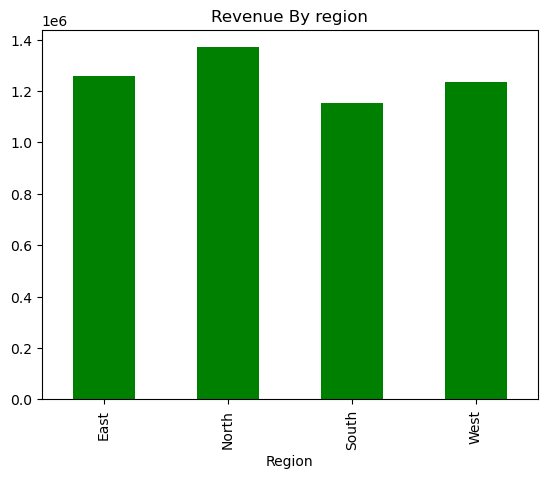

In [36]:
#Show Sales Amount by Region
df.groupby("Region")["Sales_Amount"].sum().plot(kind='bar',color='Green',title="Revenue By region")

<Axes: title={'center': 'Unitsold by region'}, ylabel='Region'>

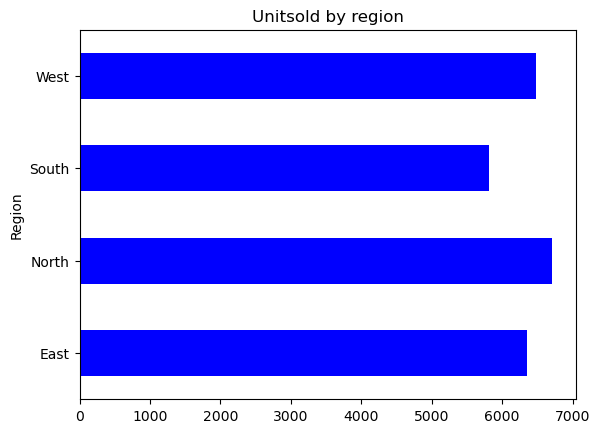

In [40]:
#Show Quantity Sold by Region
df.groupby("Region")["Quantity_Sold"].sum().plot(kind='barh',color='blue',title="Unitsold by region")


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

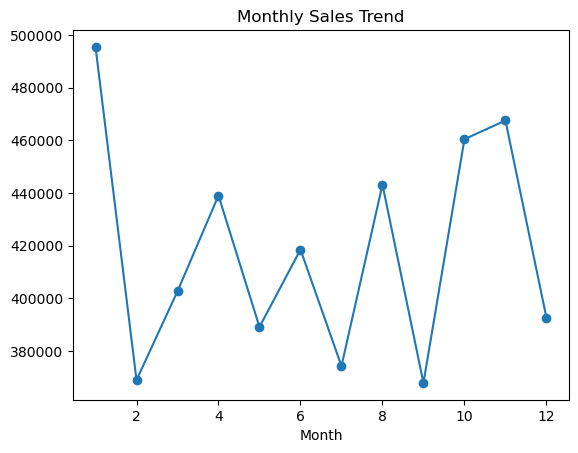

In [41]:
#monthly sales
df.groupby("Month")["Sales_Amount"].sum().plot(kind="line", marker="o", title="Monthly Sales Trend")


<Axes: title={'center': 'Top 10 Sales Reps'}, xlabel='Sales_Rep'>

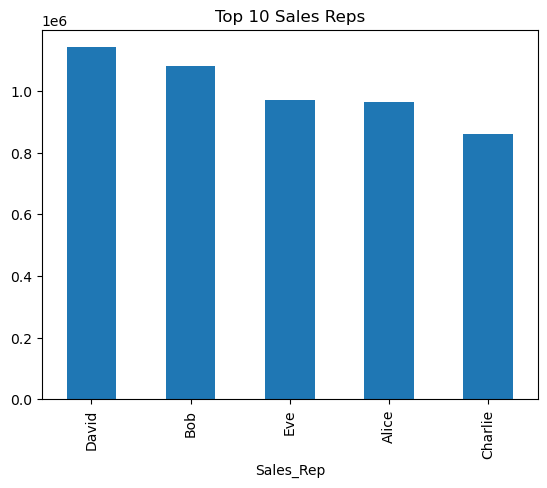

In [42]:
#show Top 10 Sales Reps by Sales Amount
df.groupby("Sales_Rep")["Sales_Amount"].sum().nlargest(10).plot(kind="bar", title="Top 10 Sales Reps")
